In [1]:
# импортируем необходимые библиотеки, классы и функции
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
%config InlineBackend.figure_format = 'retina'

In [2]:
# загружаем данные
df = pd.read_csv('Data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [3]:
# создаем модель Prophet, явно задав growth='linear'
model = Prophet(growth='linear',
                seasonality_mode='multiplicative',
                yearly_seasonality=4)

22:06:19 - cmdstanpy - INFO - Chain [1] start processing
22:06:19 - cmdstanpy - INFO - Chain [1] done processing


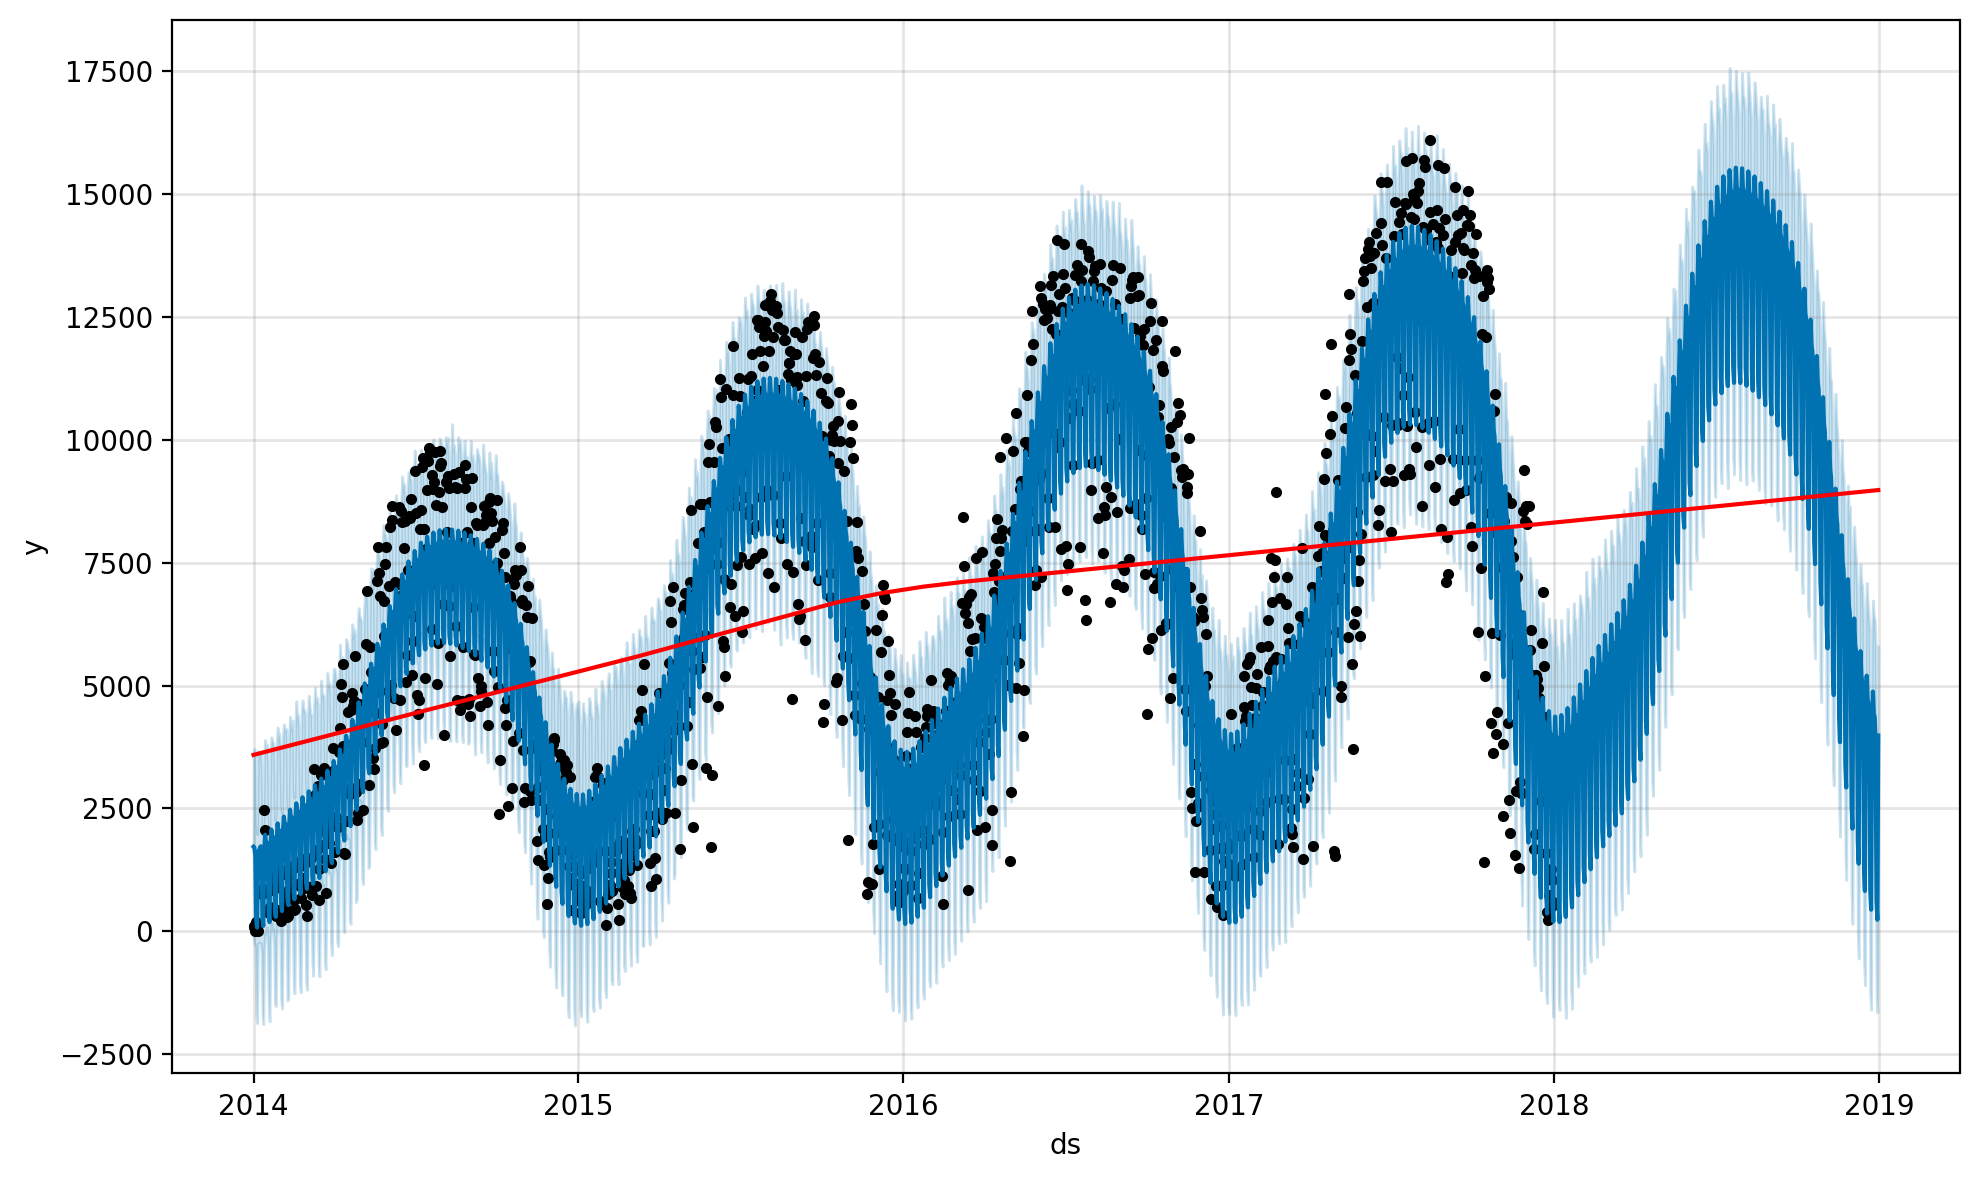

In [4]:
# обучаем модель
model.fit(df)
# получаем прогнозы
future = model.make_future_dataframe(periods=365)
# визуализируем прогнозы
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), 
                         model, 
                         forecast, 
                         cp_linestyle='')
plt.show()

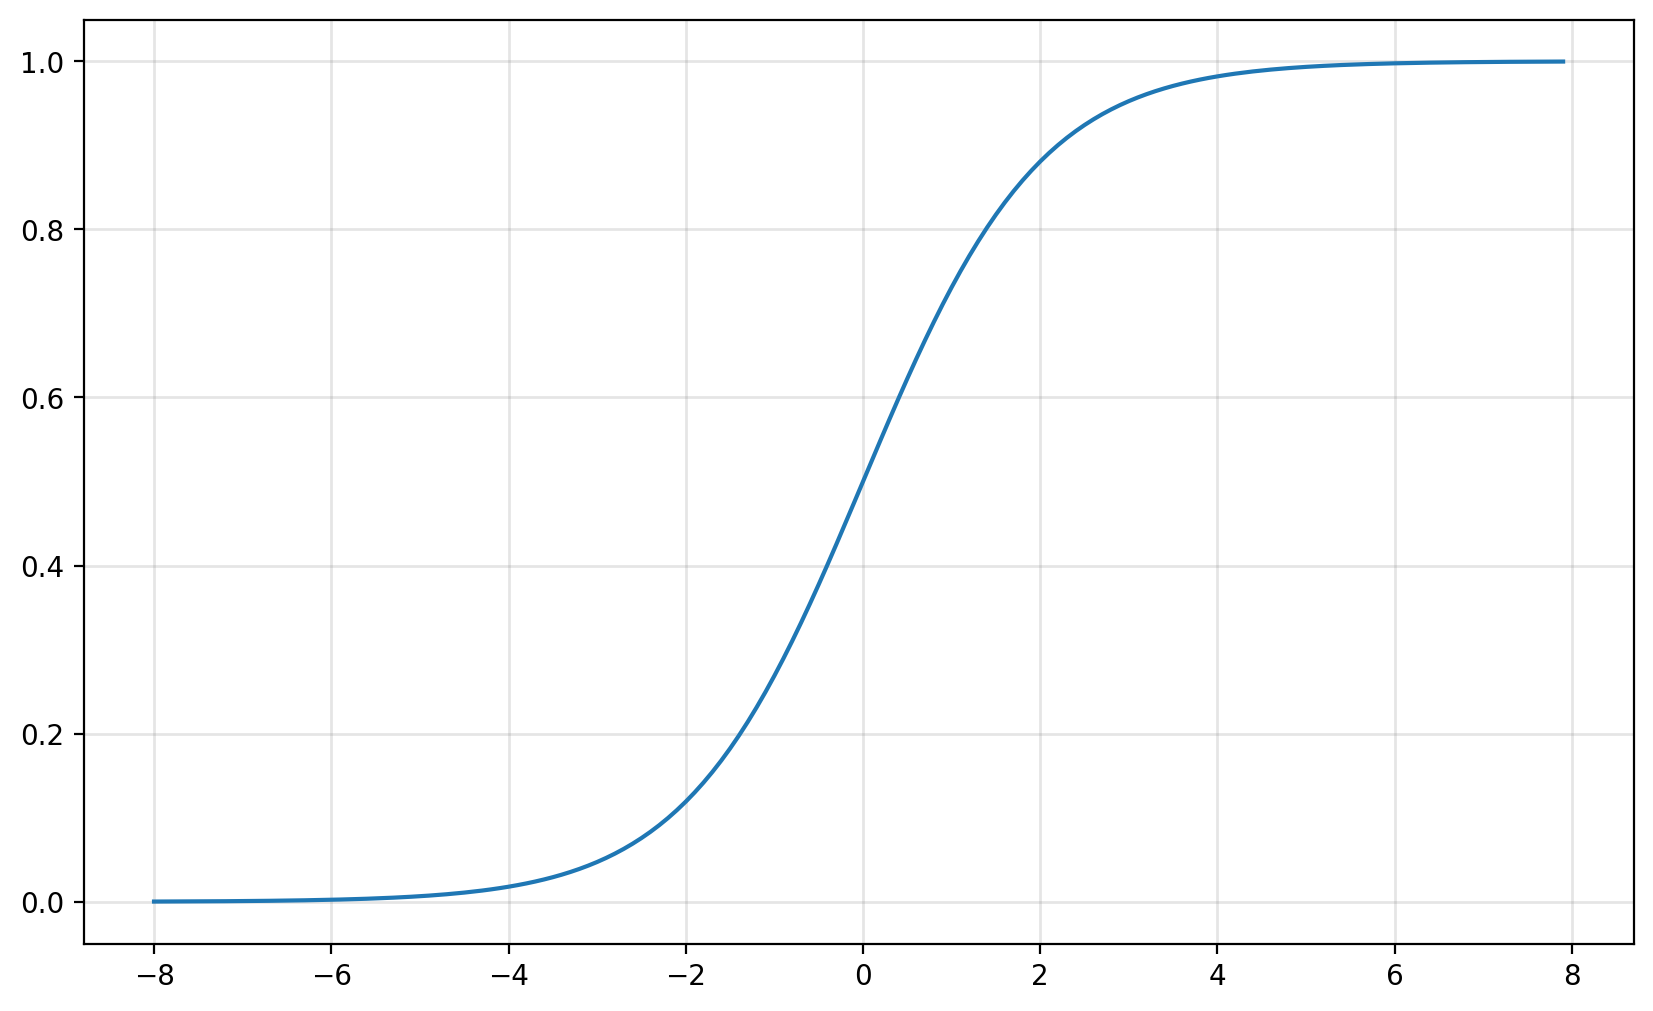

In [5]:
# визуализируем логистическую кривую
import numpy as np
import random
random.seed(42)
x = np.arange(-8, 8, .1)
y = [1 / (1 + np.e**(-val)) for val in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.grid(True, which='major', c='gray', 
         ls='-', lw=1, alpha=0.2)
plt.show()

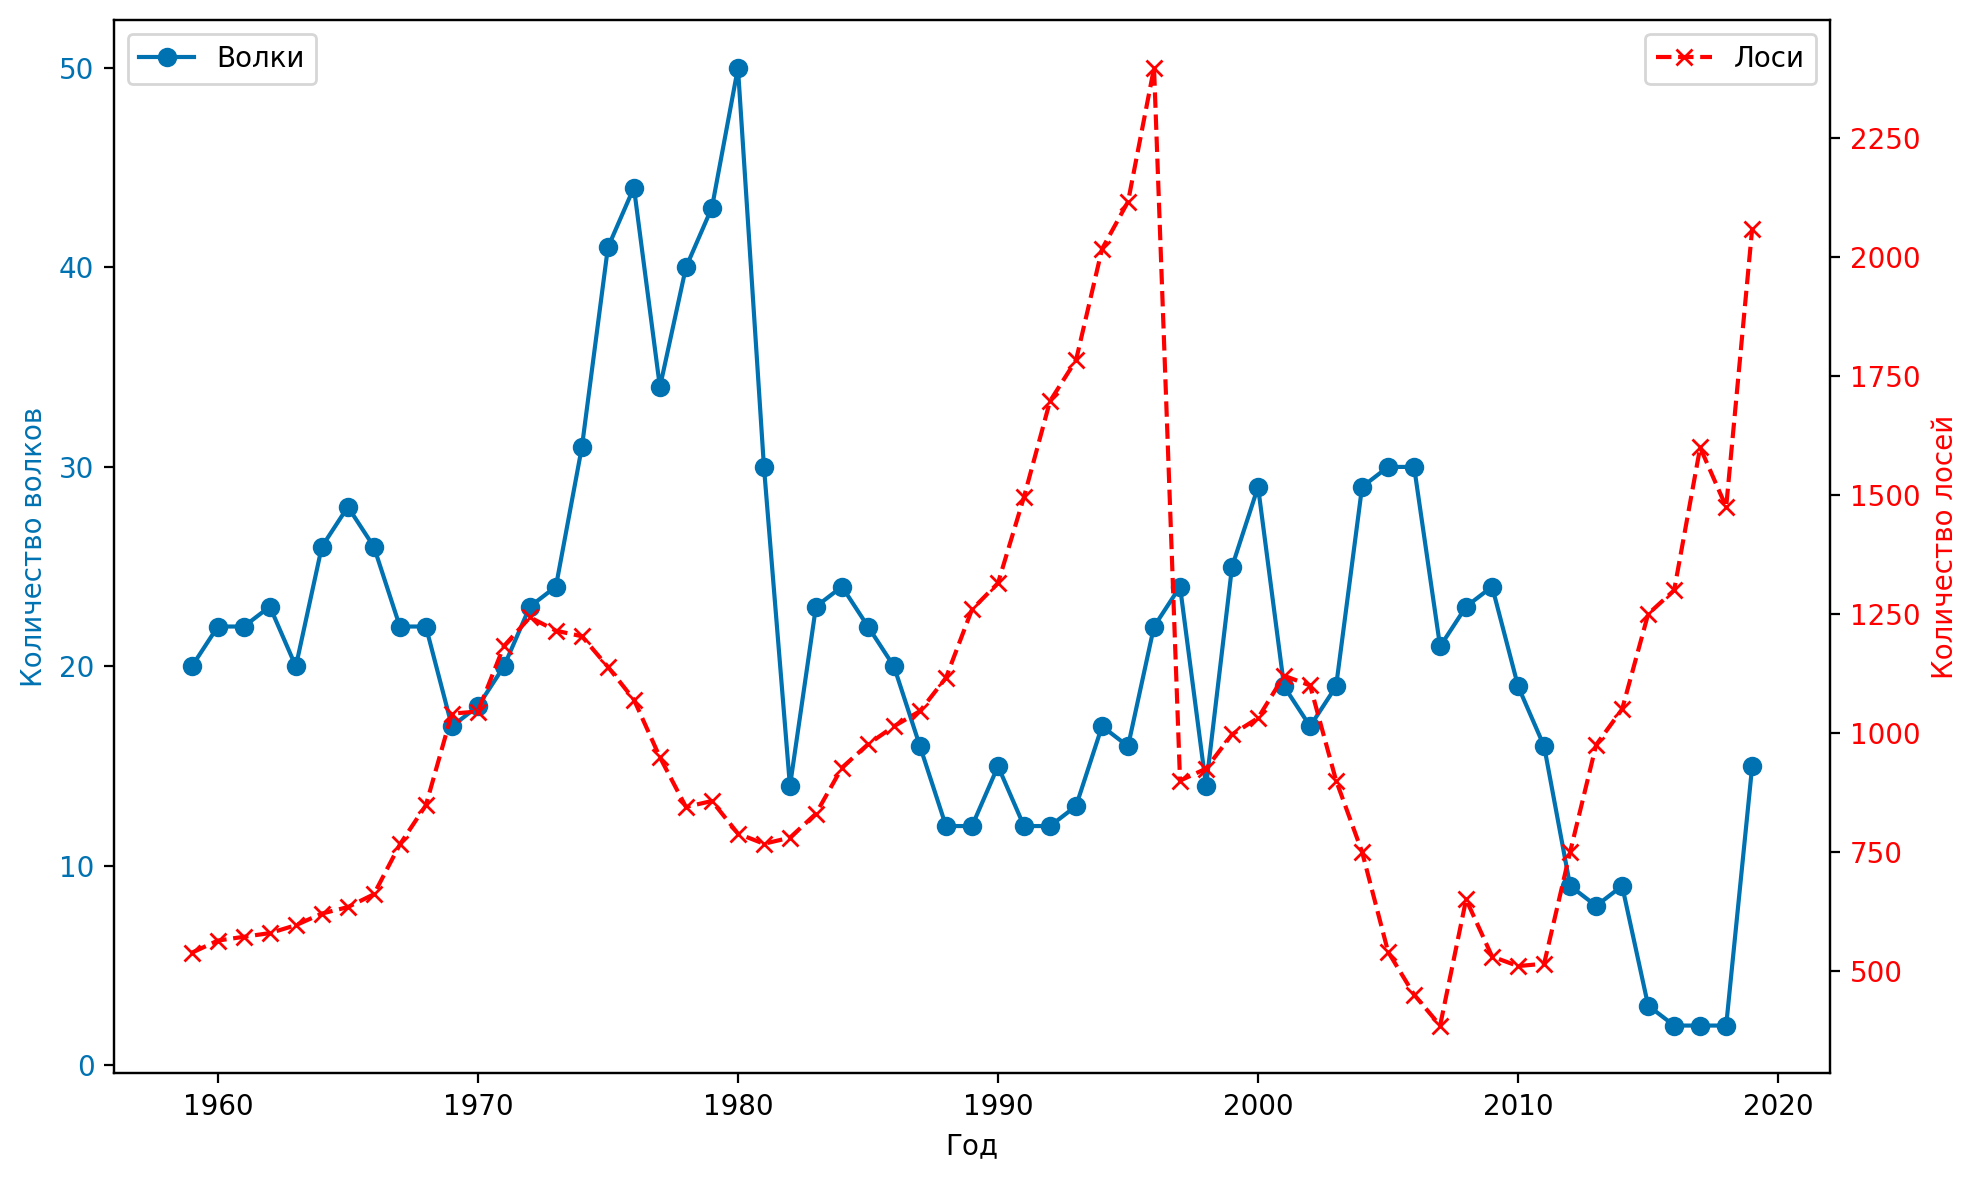

In [6]:
ir = pd.read_excel('Data/Data_wolves_moose_Isle_Royale_June2019.xlsx',
                     sheet_name='1. population level data',
                     header=1)

fig, ax1 = plt.subplots(figsize=(10, 6))
color = '#0072B2'
ax1.set_xlabel('Год')
ax1.set_ylabel('Количество волков', color=color)
ax1.plot(ir['year'], ir['wolves'], color=color, 
         ls='-', marker='o', label='Волки')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

color = 'r'
ax2.set_ylabel('Количество лосей', color=color)
ax2.plot(ir['year'], ir['moose'], color=color, 
         ls='--', marker='x', label='Лоси')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [7]:
# создаем список временных меток
x = pd.to_datetime(pd.date_range(
    '1995-01', '2004-02', freq='M').strftime("%Y-%b").tolist())
# создаем логистическую кривую
y = [1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]
# добавляем синусоидальные вариации для эмуляции сезонности
y = [y[idx] + y[idx] * .01 * np.sin(
    (idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]
# добавляем случайный шум
y = [val + random.uniform(-.01, .01) for val in y]
# отмасштабируем наши данные
y = [int(500 * val) for val in y]

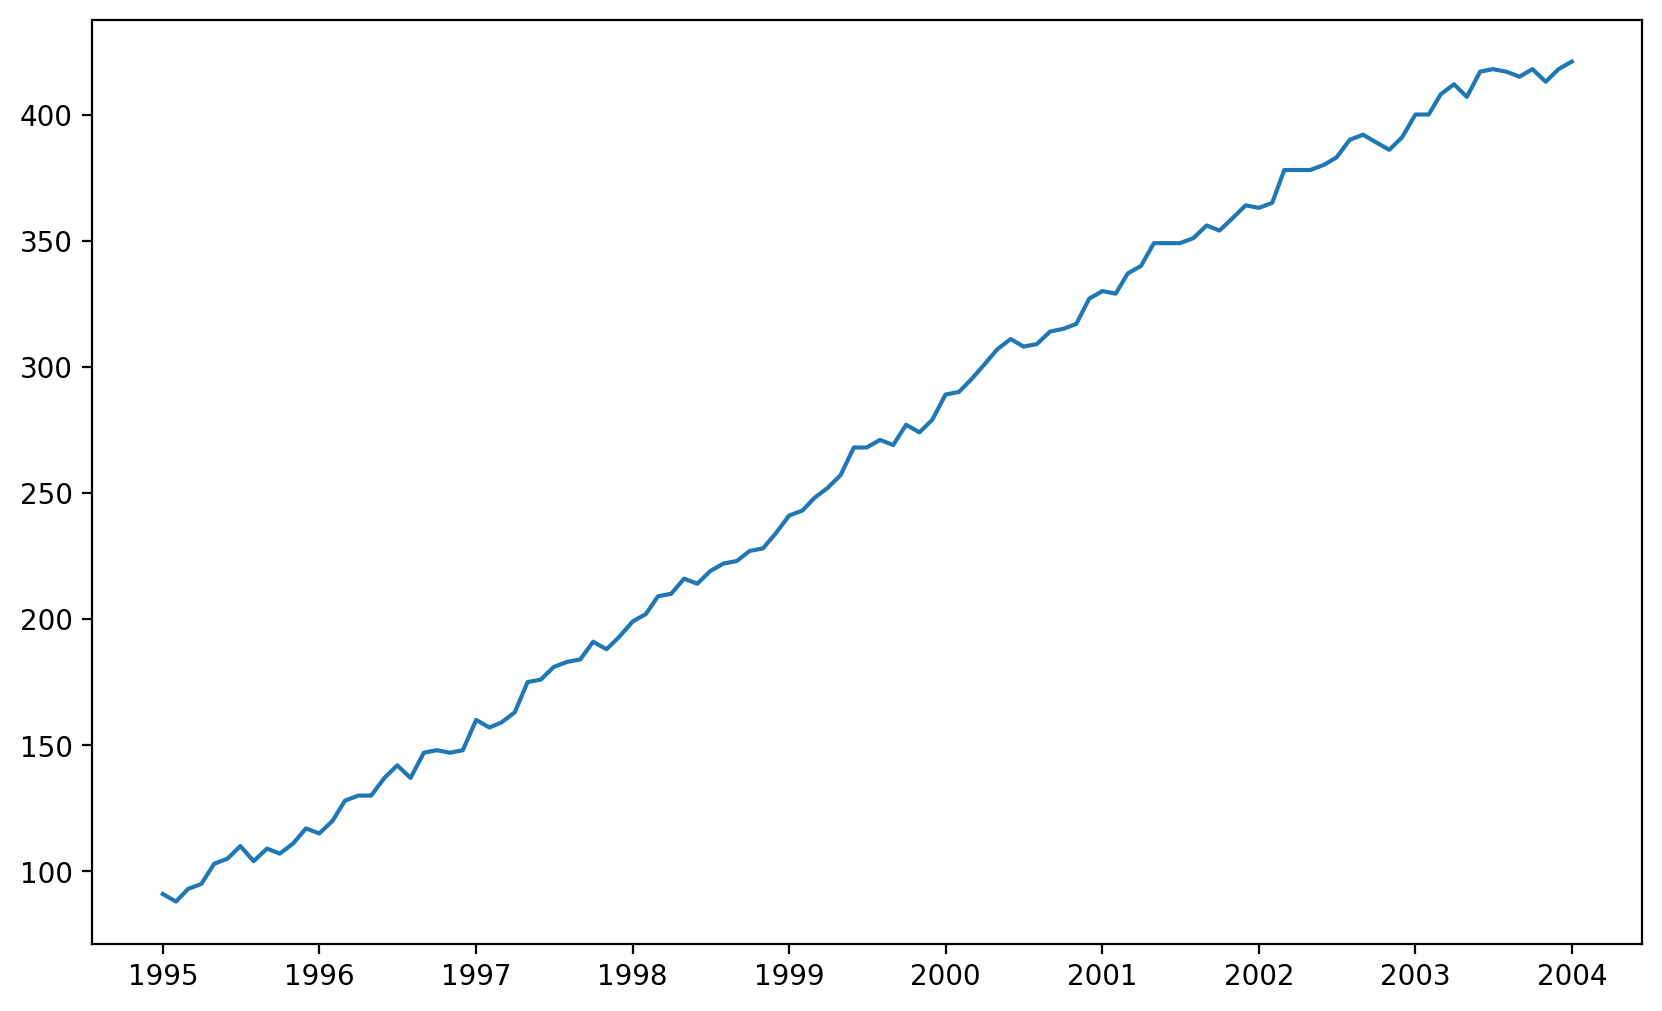

In [8]:
# визуализируем данные
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

In [9]:
# создаем датафрейм
df = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})

22:06:22 - cmdstanpy - INFO - Chain [1] start processing
22:06:22 - cmdstanpy - INFO - Chain [1] done processing


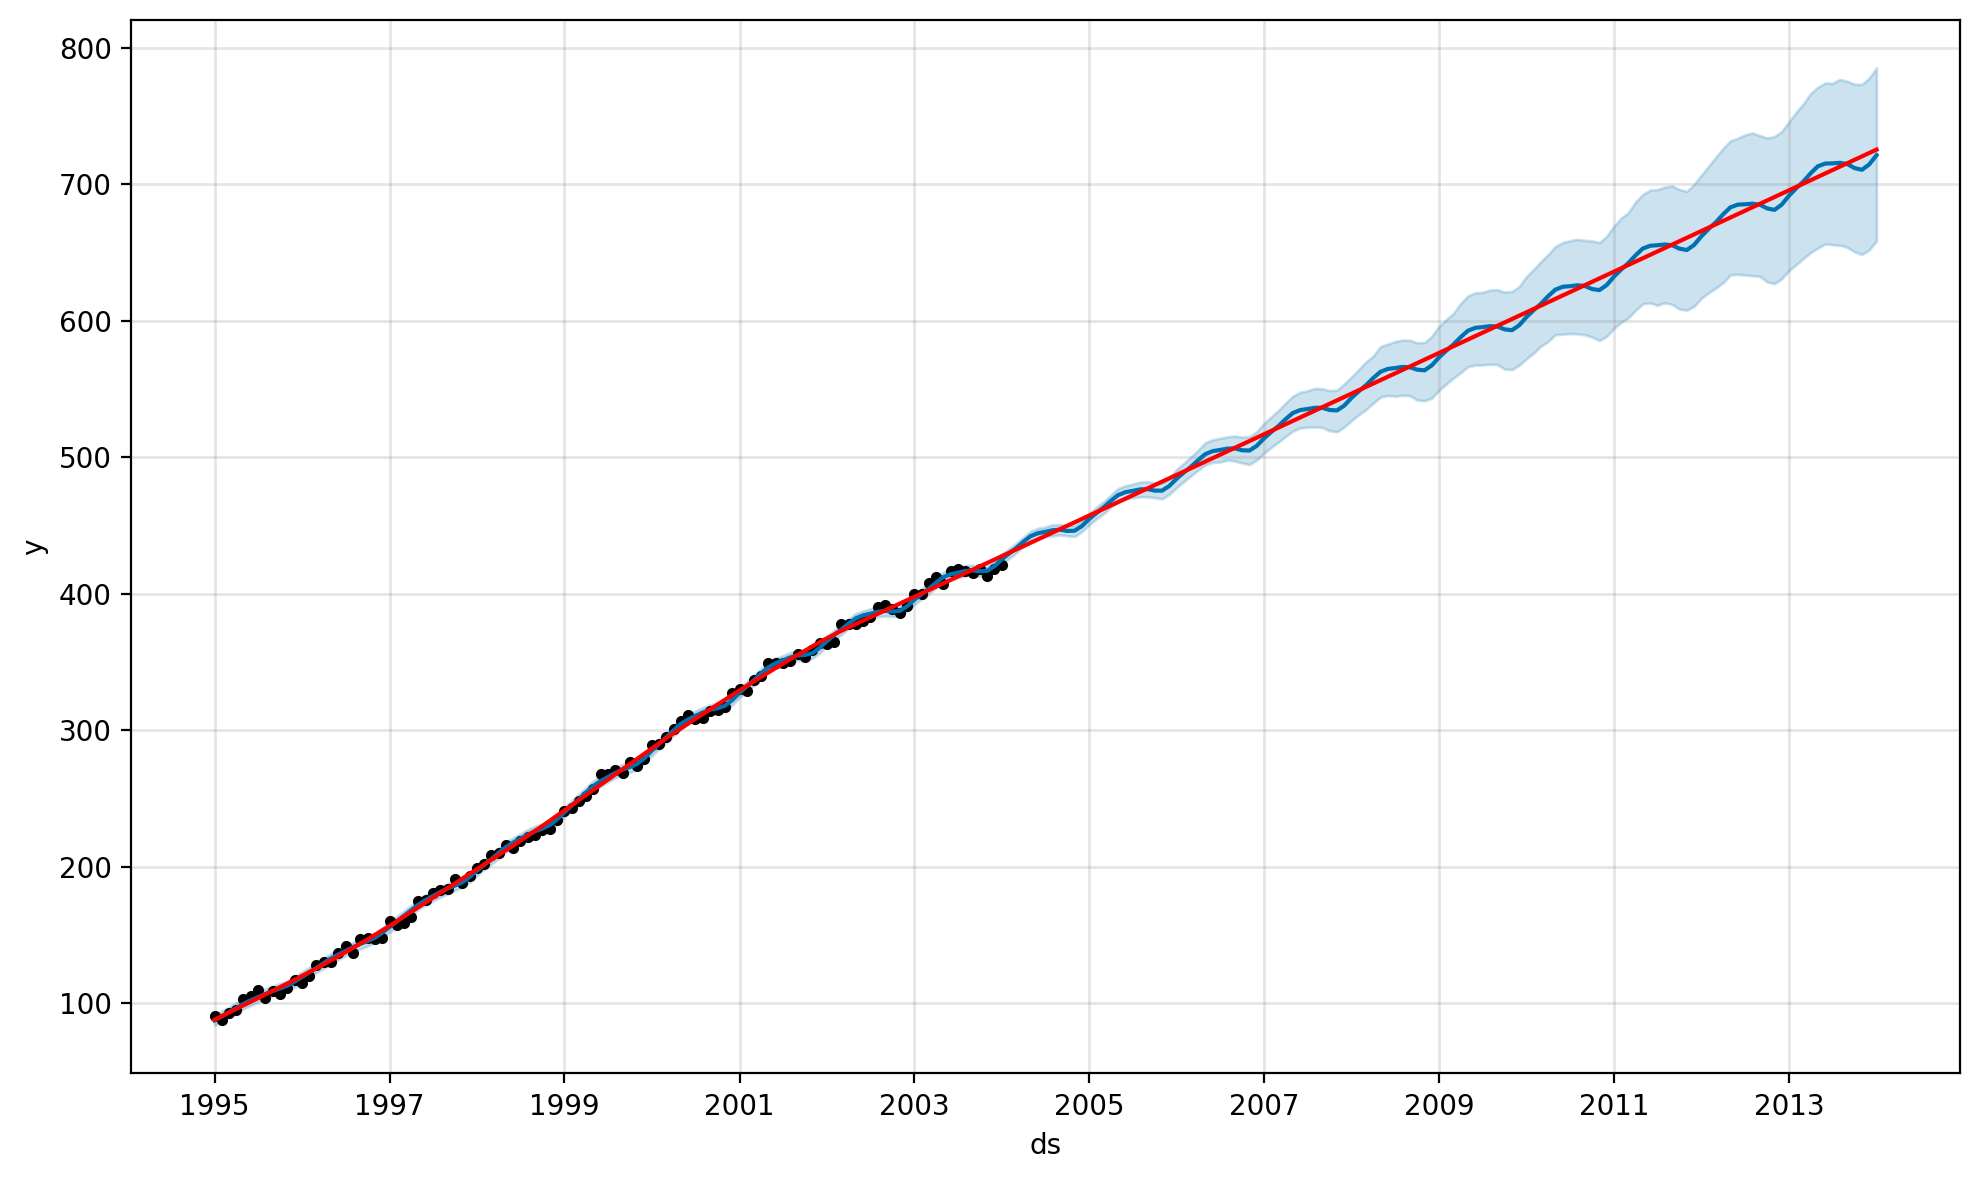

In [10]:
# создаем модель Prophet с линейным ростом 
# и мультипликативной сезонностью
model = Prophet(growth='linear',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
# обучаем модель
model.fit(df)
# создаем удлиненный датафрейм, задав ежемесячную частоту,
# поскольку мы создали ежемесячный временной ряд
future = model.make_future_dataframe(periods=12 * 10, freq='M')
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
# накладываем линию тренда на график прогнозов
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

In [11]:
# задаем предельное значение в датафрейме исторических данных
df['cap'] = 500

In [12]:
# создаем модель Prophet с логистическим ростом 
# и мультипликативной сезонностью
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
# обучаем модель
model.fit(df)
# создаем удлиненный датафрейм, задав ежемесячную частоту,
# поскольку мы создали ежемесячный временной ряд
future = model.make_future_dataframe(periods=12 * 10, freq='M')

22:06:24 - cmdstanpy - INFO - Chain [1] start processing
22:06:24 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# задаем предельное значение в удлиненном датафрейме
future['cap'] = 500

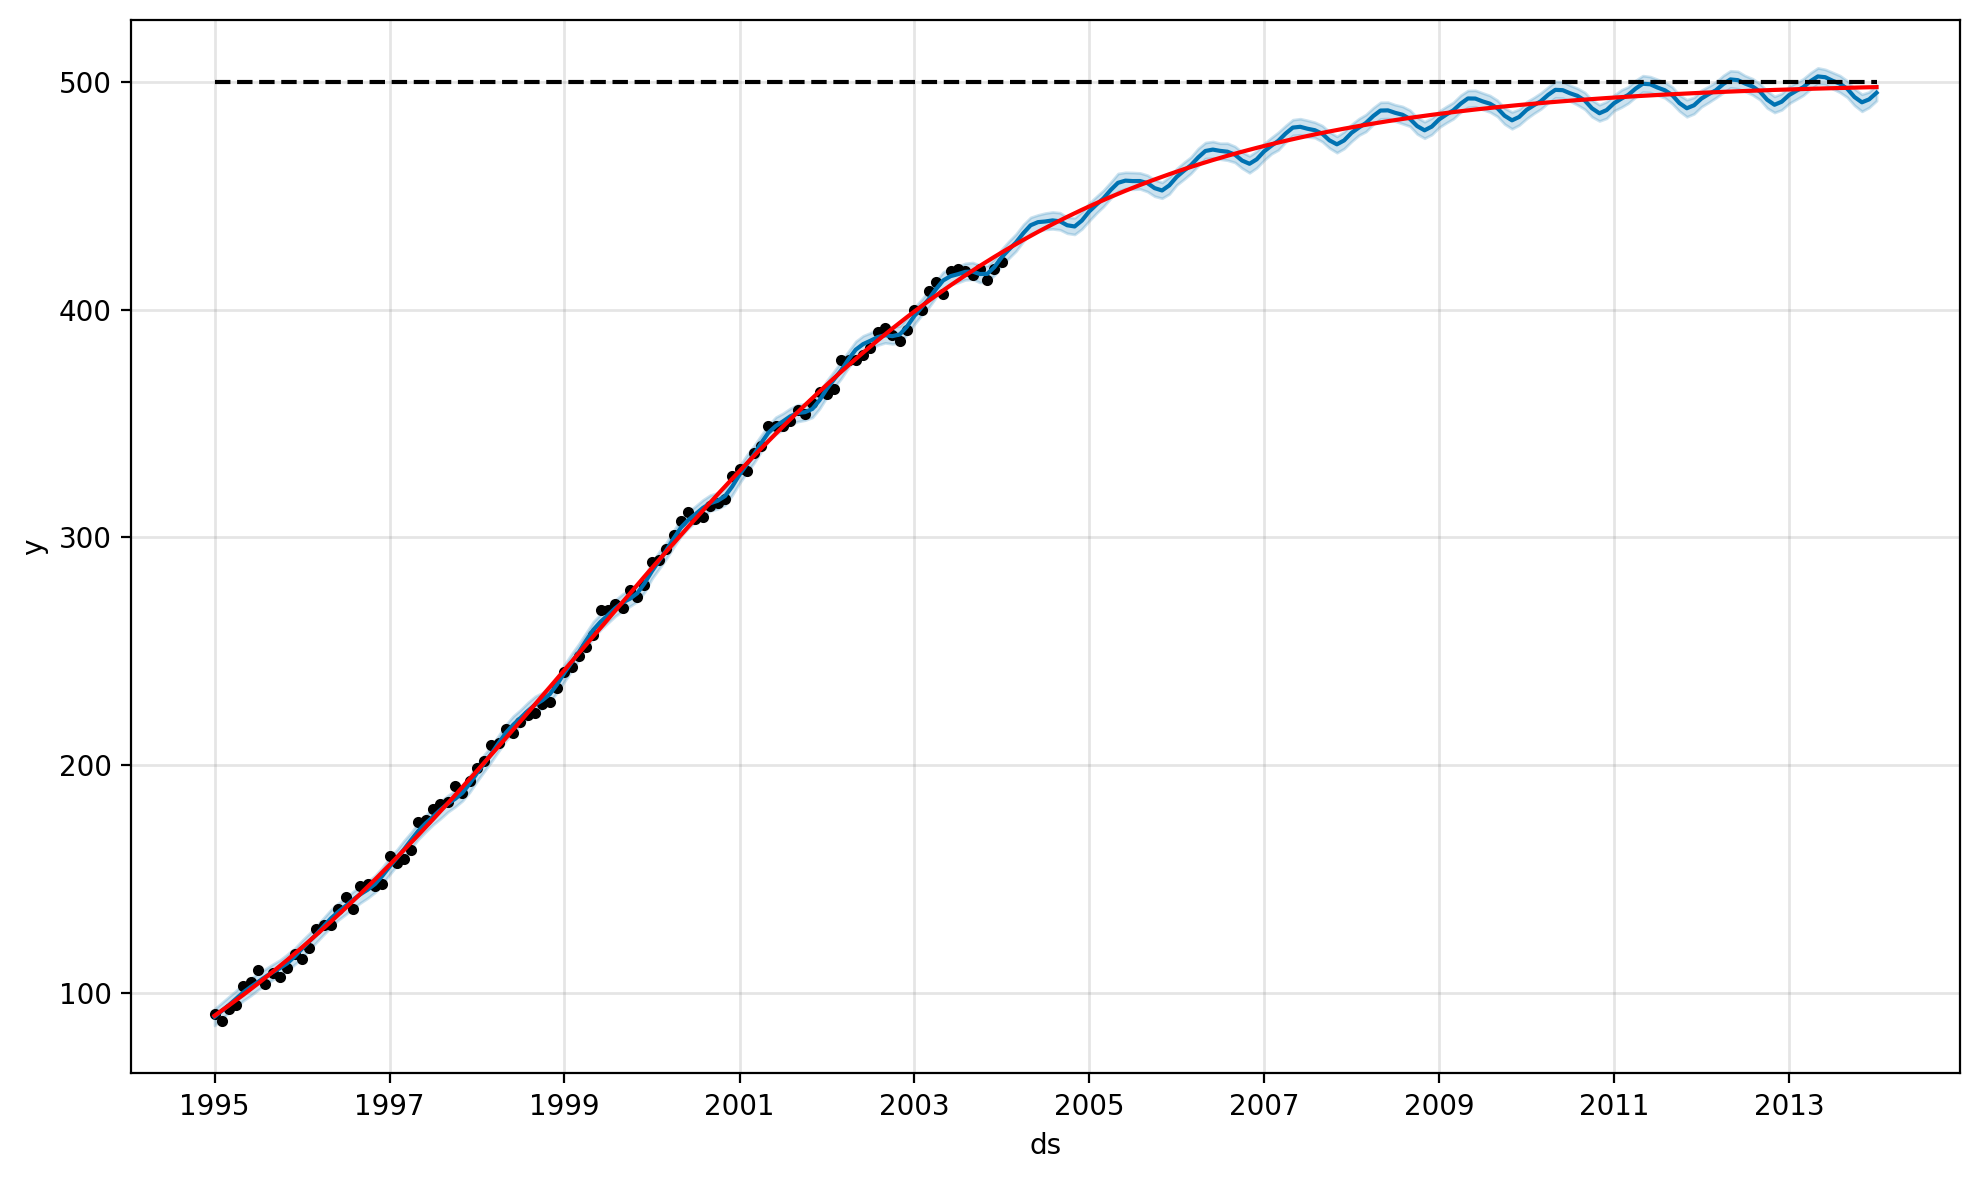

In [14]:
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
# накладываем линию тренда на график прогнозов
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

In [15]:
# пишем функцию, задающую предельное значение
def set_cap(row, df):
    if row.year < 2007:
        return 500
    else:
        pop_2007 = 500
        idx_2007 = df[df['ds'].dt.year == 2007].index[0]
        idx_date = df[df['ds'] == row].index[0]
        return pop_2007 + 2 * (idx_date - idx_2007)

In [16]:
# задаем cap для обучающего датафрейма
df['cap'] = df['ds'].apply(set_cap, args=(df,))

22:06:26 - cmdstanpy - INFO - Chain [1] start processing
22:06:26 - cmdstanpy - INFO - Chain [1] done processing


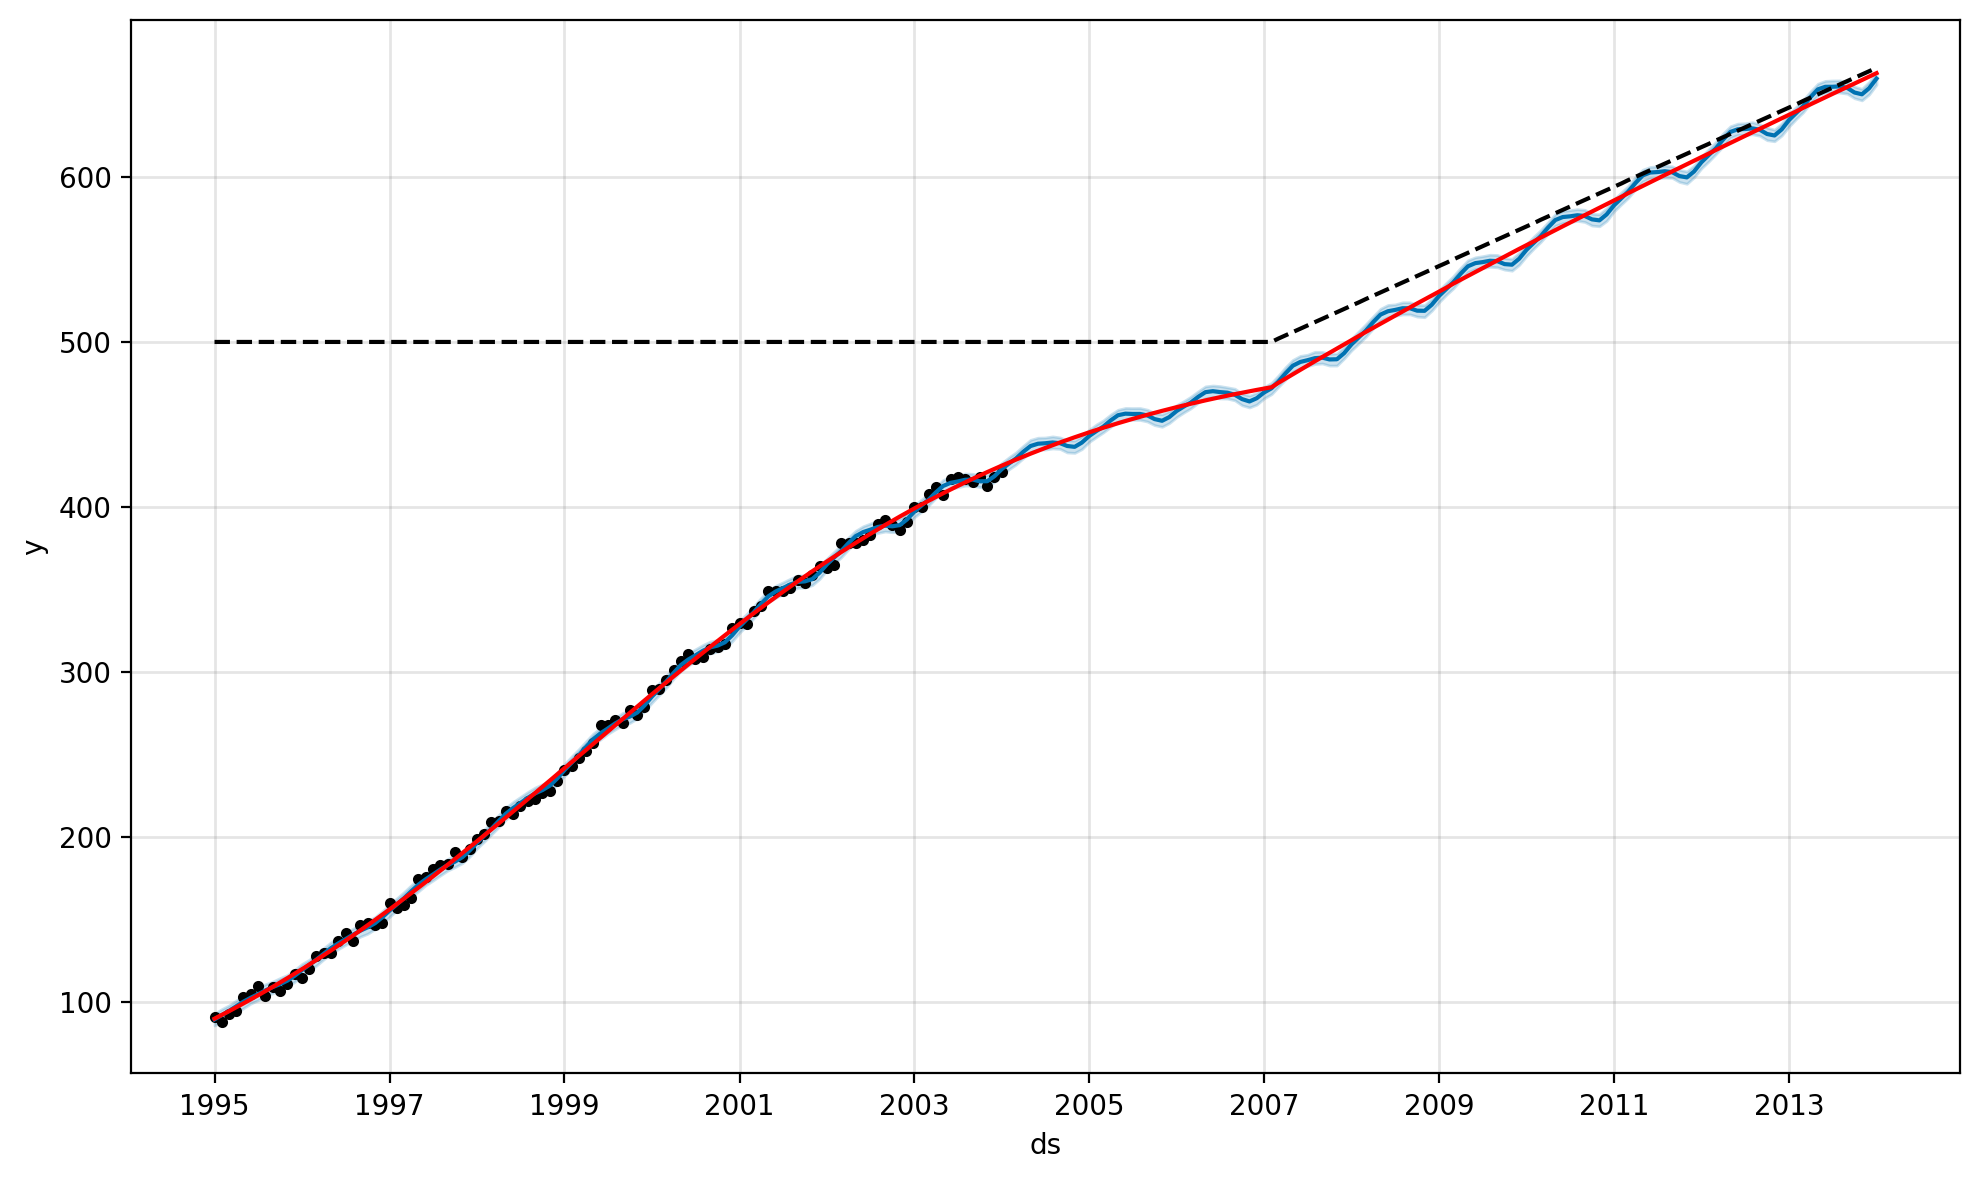

In [17]:
# создаем модель Prophet с логистическим ростом 
# и мультипликативной сезонностью
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
# обучаем модель
model.fit(df)
# создаем удлиненный датафрейм, задав ежемесячную частоту,
# поскольку мы создали ежемесячный временной ряд
future = model.make_future_dataframe(periods=12 * 10, freq='M')
# задаем cap для удлиненного датафрейма
future['cap'] = future['ds'].apply(set_cap, args=(future,))
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
# накладываем линию тренда на график прогнозов
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

In [18]:
# создаем список временных меток
x = pd.to_datetime(pd.date_range(
    '1995-01','2035-02', freq='M').strftime("%Y-%b").tolist())
# создаем логистическую кривую
y = [1 - 1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]
# добавляем синусоидальные вариации для эмуляции сезонности
y = [y[idx] + y[idx] * .05 * np.sin(
    (idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]
# добавляем случайный шум
y = [val + 5 * val * random.uniform(-.01, .01) for val in y]
# отмасштабируем наши данные
y = [int(500 * val) for val in y]

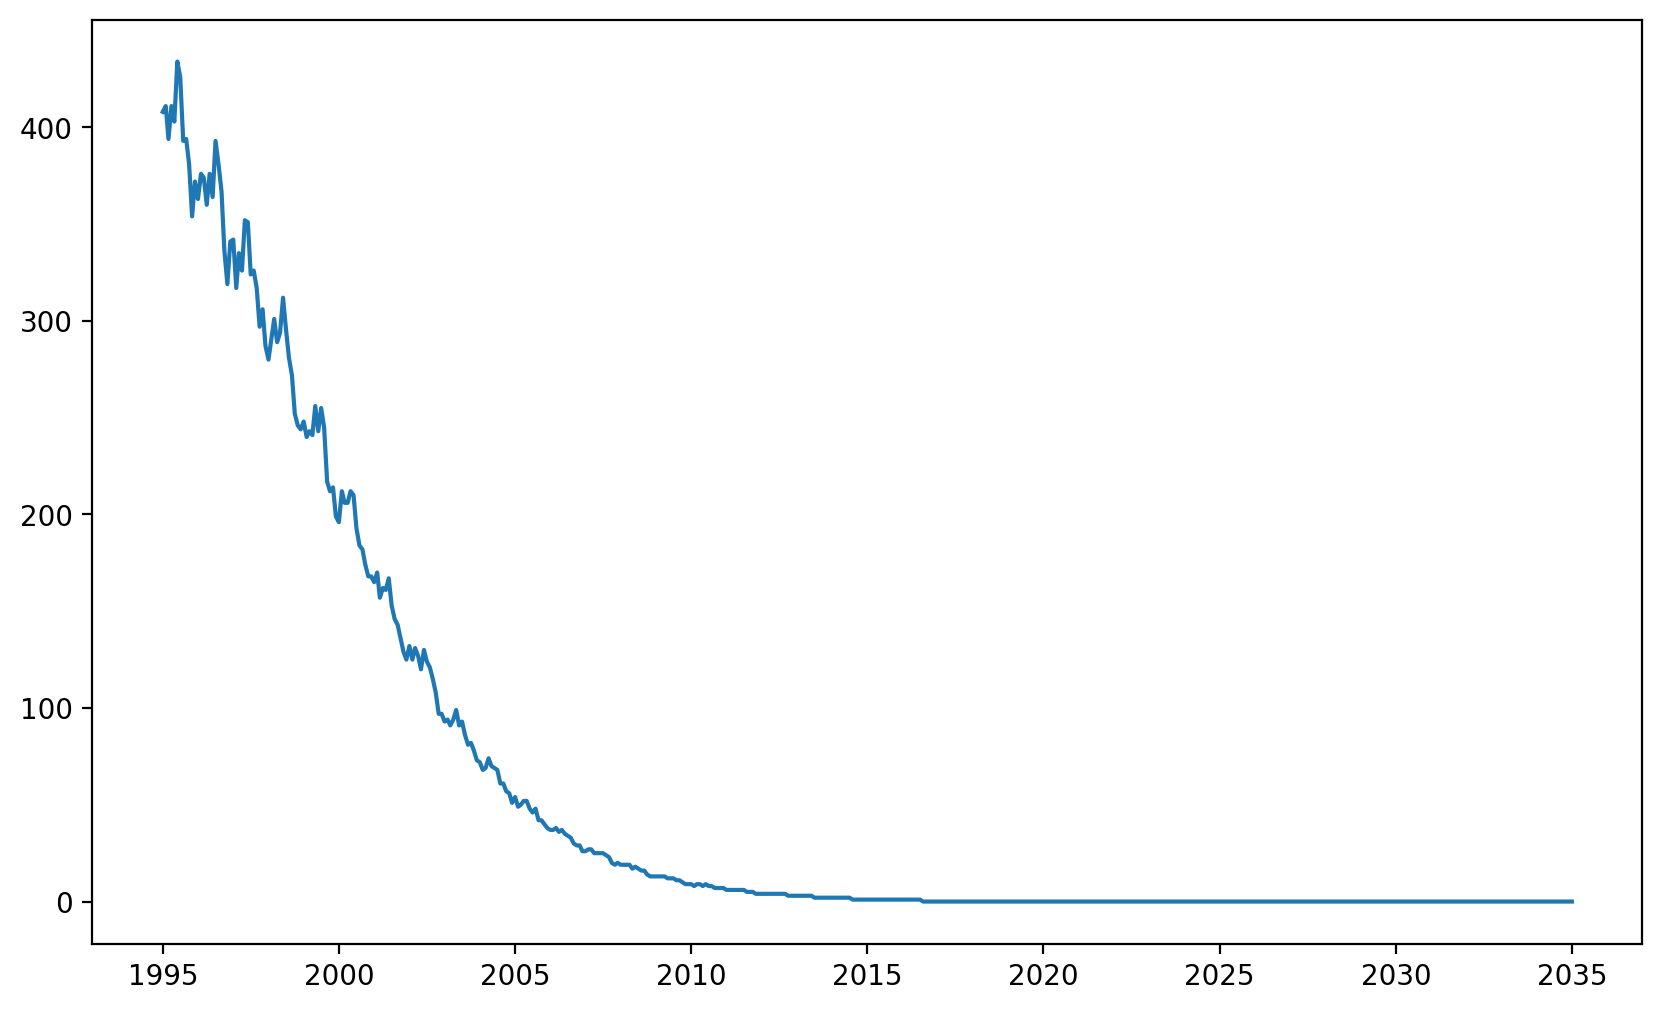

In [19]:
# визуализируем данные
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

In [20]:
# создаем обучающий датафрем с данными до 2006 года
df2 = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})
df2 = df2[df2['ds'].dt.year < 2006]
# задаем значения cap и floor для обучающего датафрейма
df2['cap'] = 500
df2['floor'] = 0

22:06:29 - cmdstanpy - INFO - Chain [1] start processing
22:06:29 - cmdstanpy - INFO - Chain [1] done processing


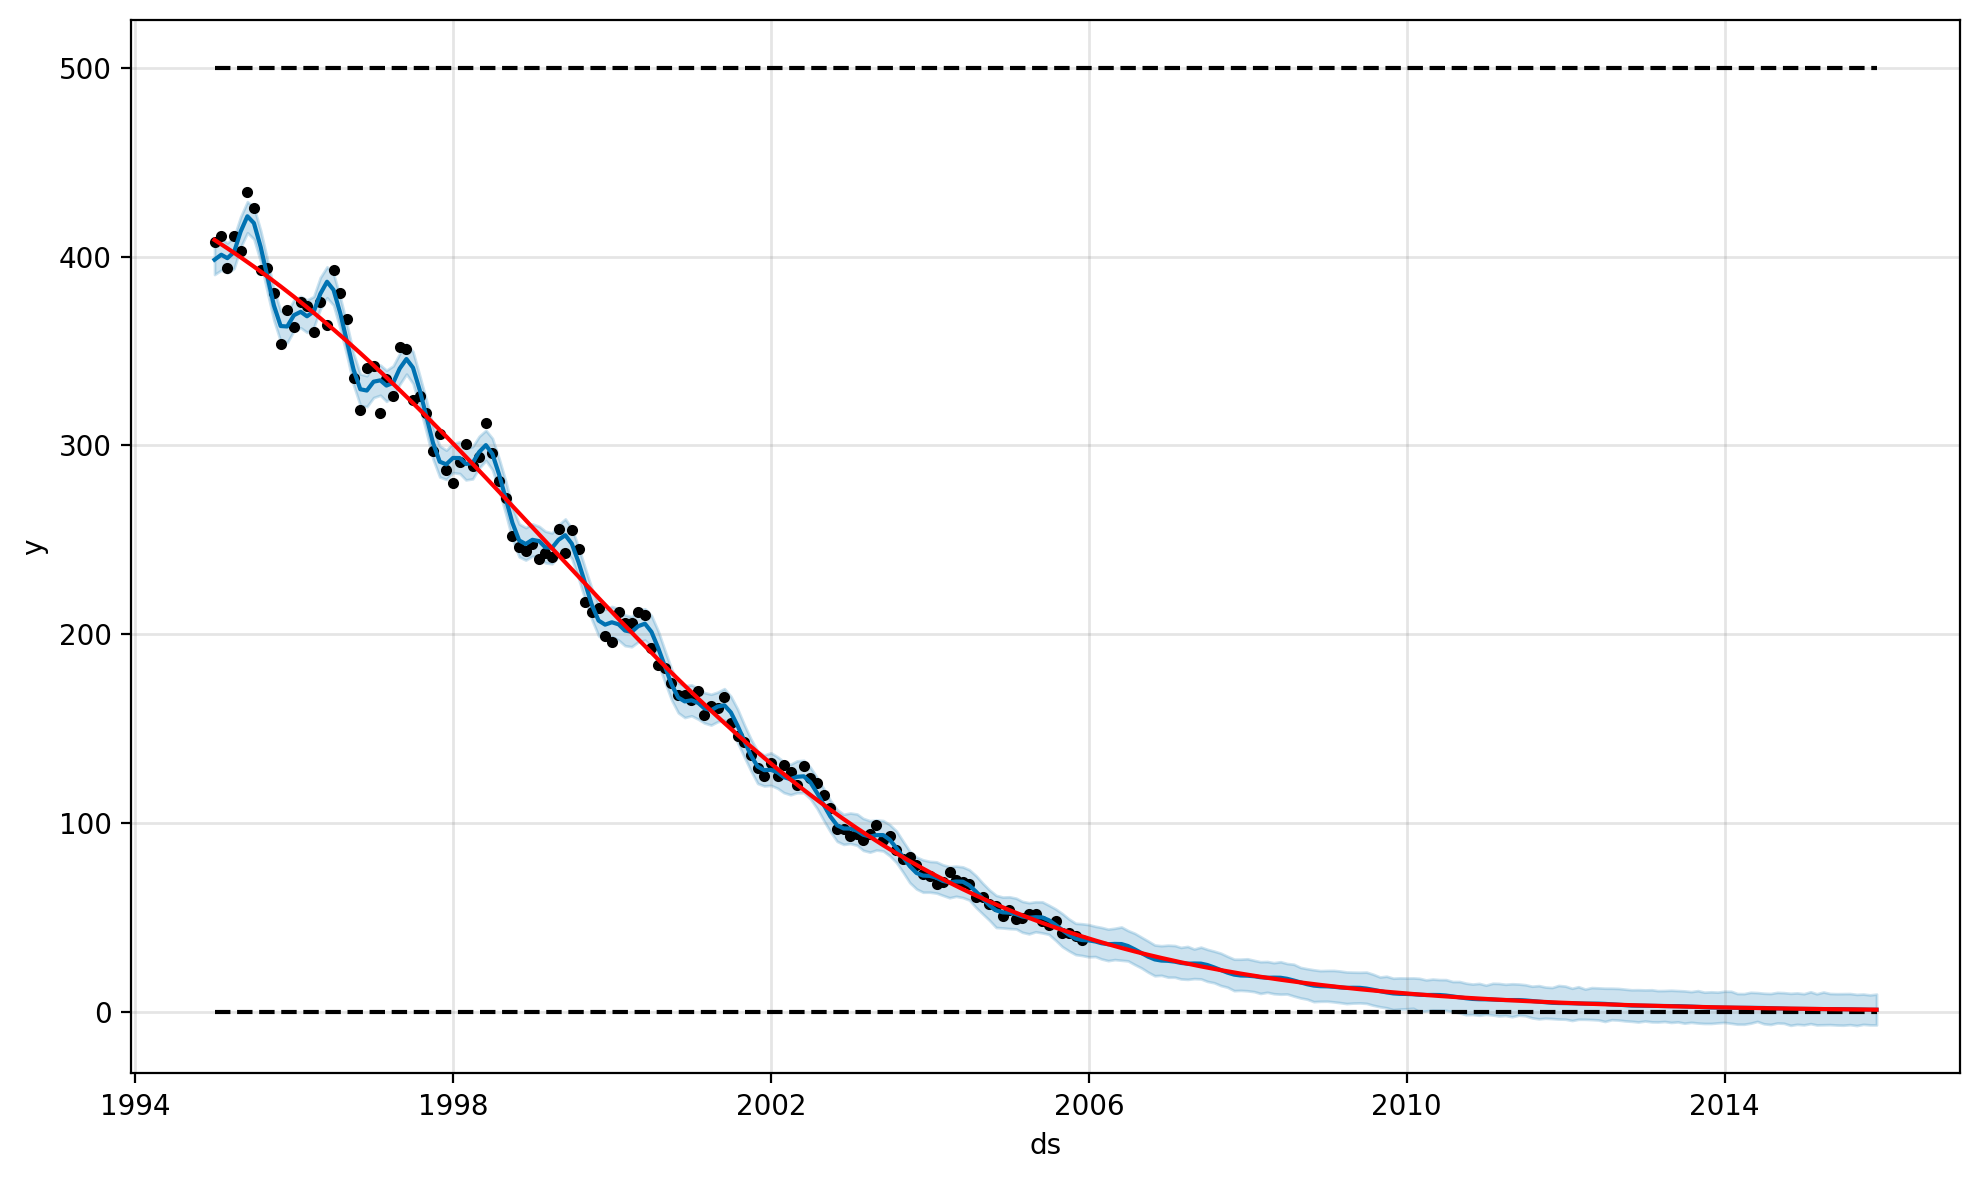

In [21]:
# создаем модель Prophet с логистическим ростом 
# и мультипликативной сезонностью
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
# обучаем модель
model.fit(df2)
# создаем удлиненный датафрейм, задав ежемесячную частоту,
# поскольку мы создали ежемесячный временной ряд
future = model.make_future_dataframe(periods=12 * 10, freq='M')
# задаем значения cap и floor для удлиненного датафрейма
future['cap'] = 500
future['floor'] = 0
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
# накладываем линию тренда на график прогнозов
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

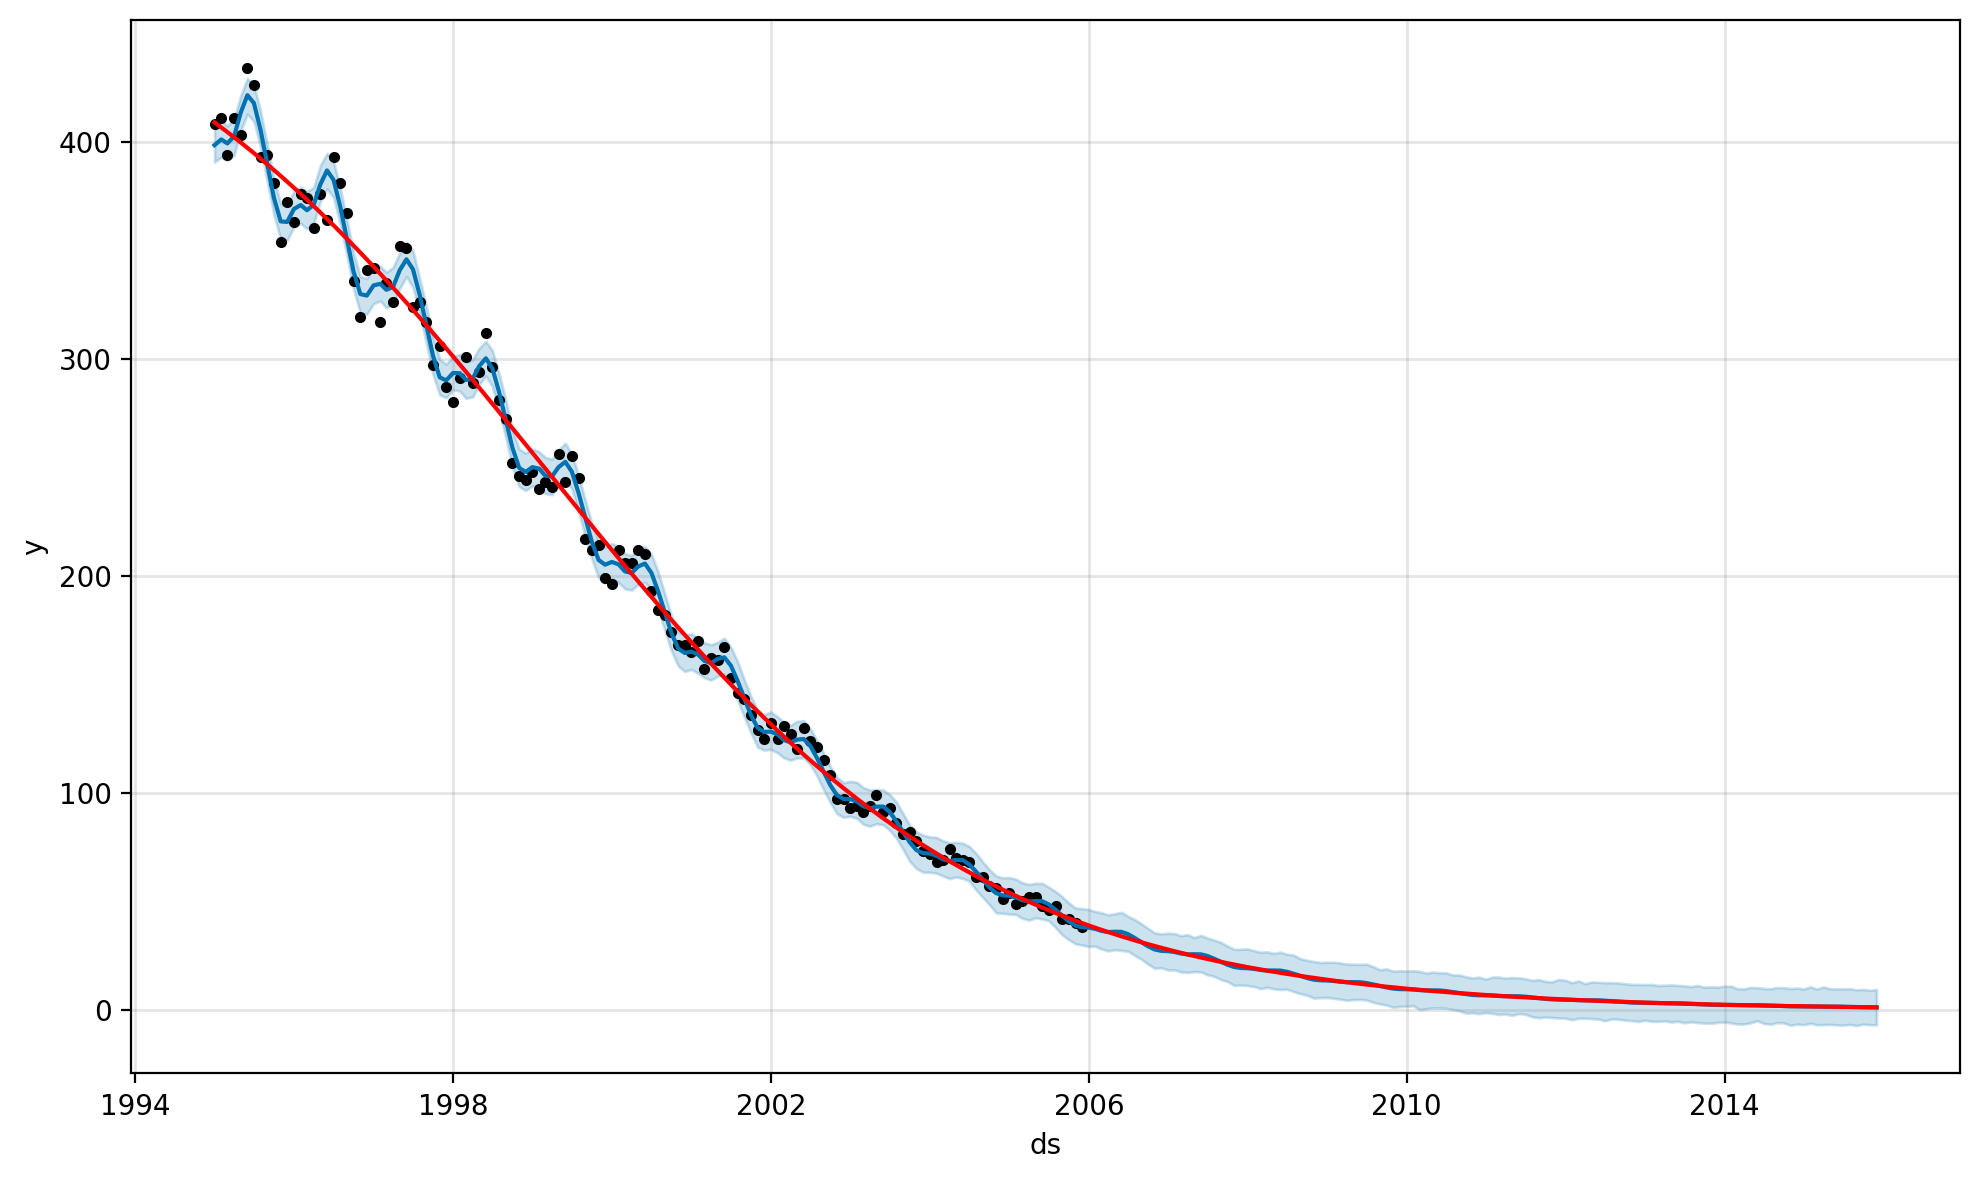

In [22]:
# визуализируем прогнозы, отключив вывод предельных значений
fig = model.plot(forecast, plot_cap=False)
# накладываем линию тренда на график прогнозов
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

In [23]:
# создаем список временных меток
x = pd.to_datetime(pd.date_range(
    '1995-01','2096-02', freq='M').strftime("%Y-%b").tolist())
# создаем логистическую кривую
y = [1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]
# добавляем синусоидальные вариации для эмуляции сезонности
y = [y[idx] + y[idx] * .01 * np.sin(
    (idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]
# добавляем случайный шум
y = [val + 1 * val * random.uniform(-.01, .01) for val in y]
# отмасштабируем наши данные
y = [int(500 * val) for val in y]

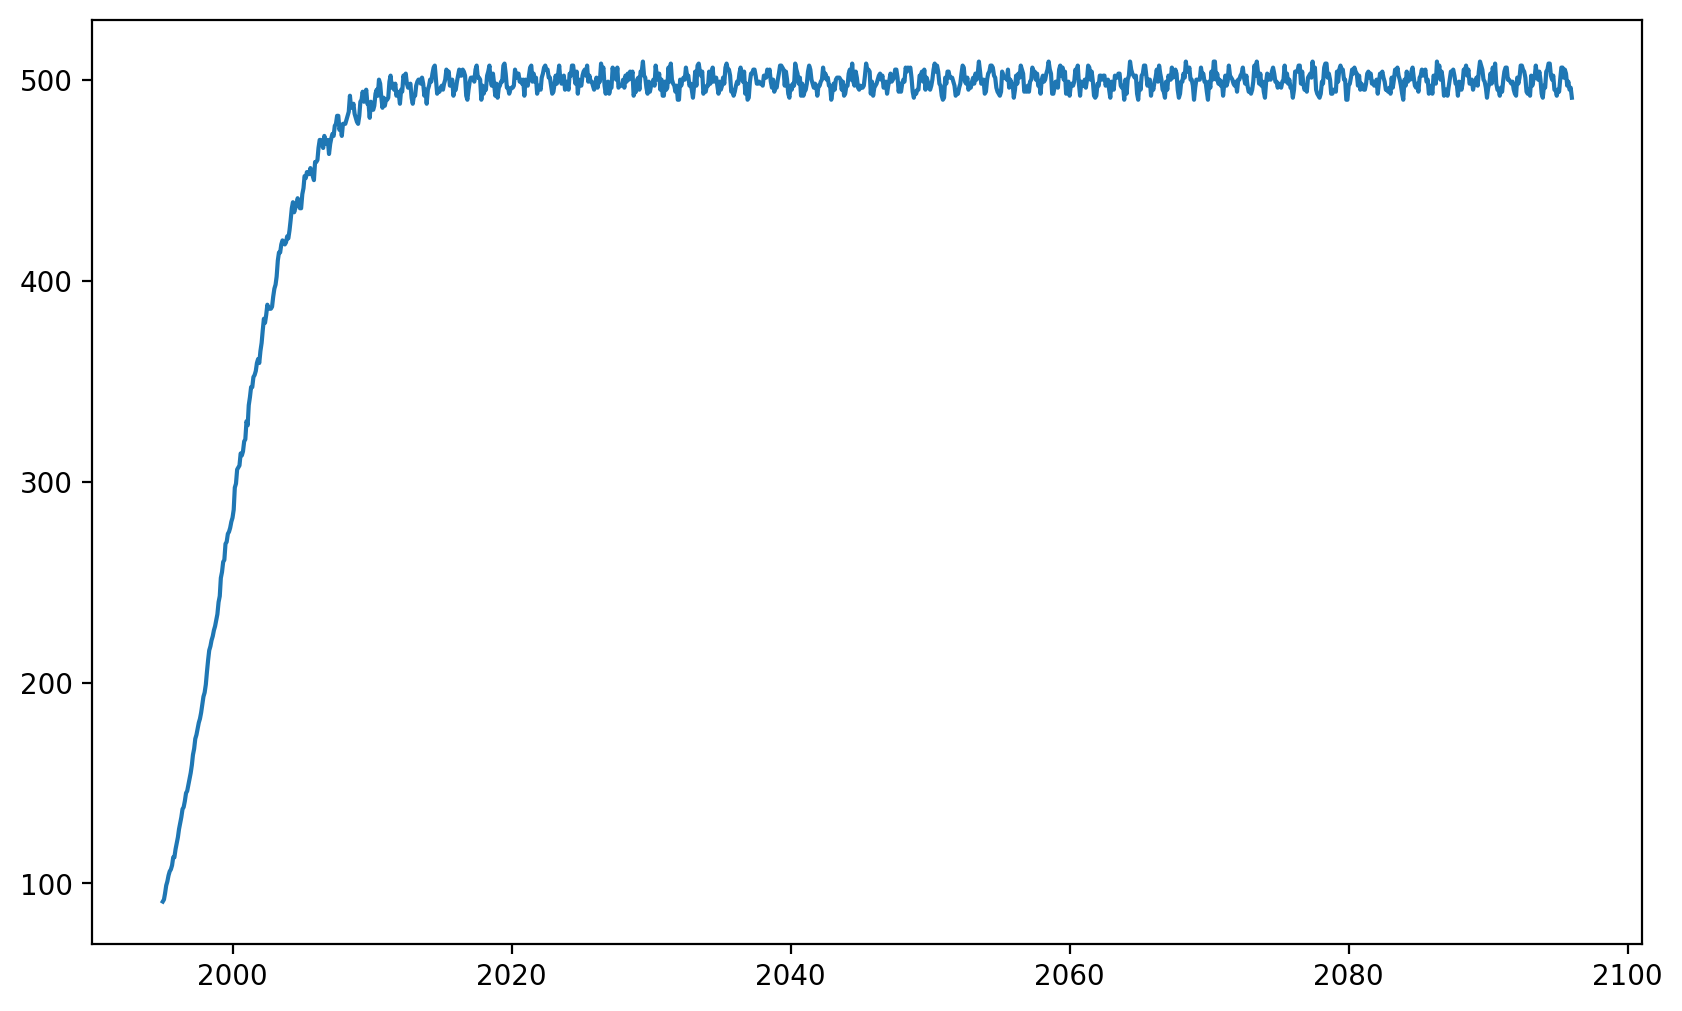

In [24]:
# визуализируем данные
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

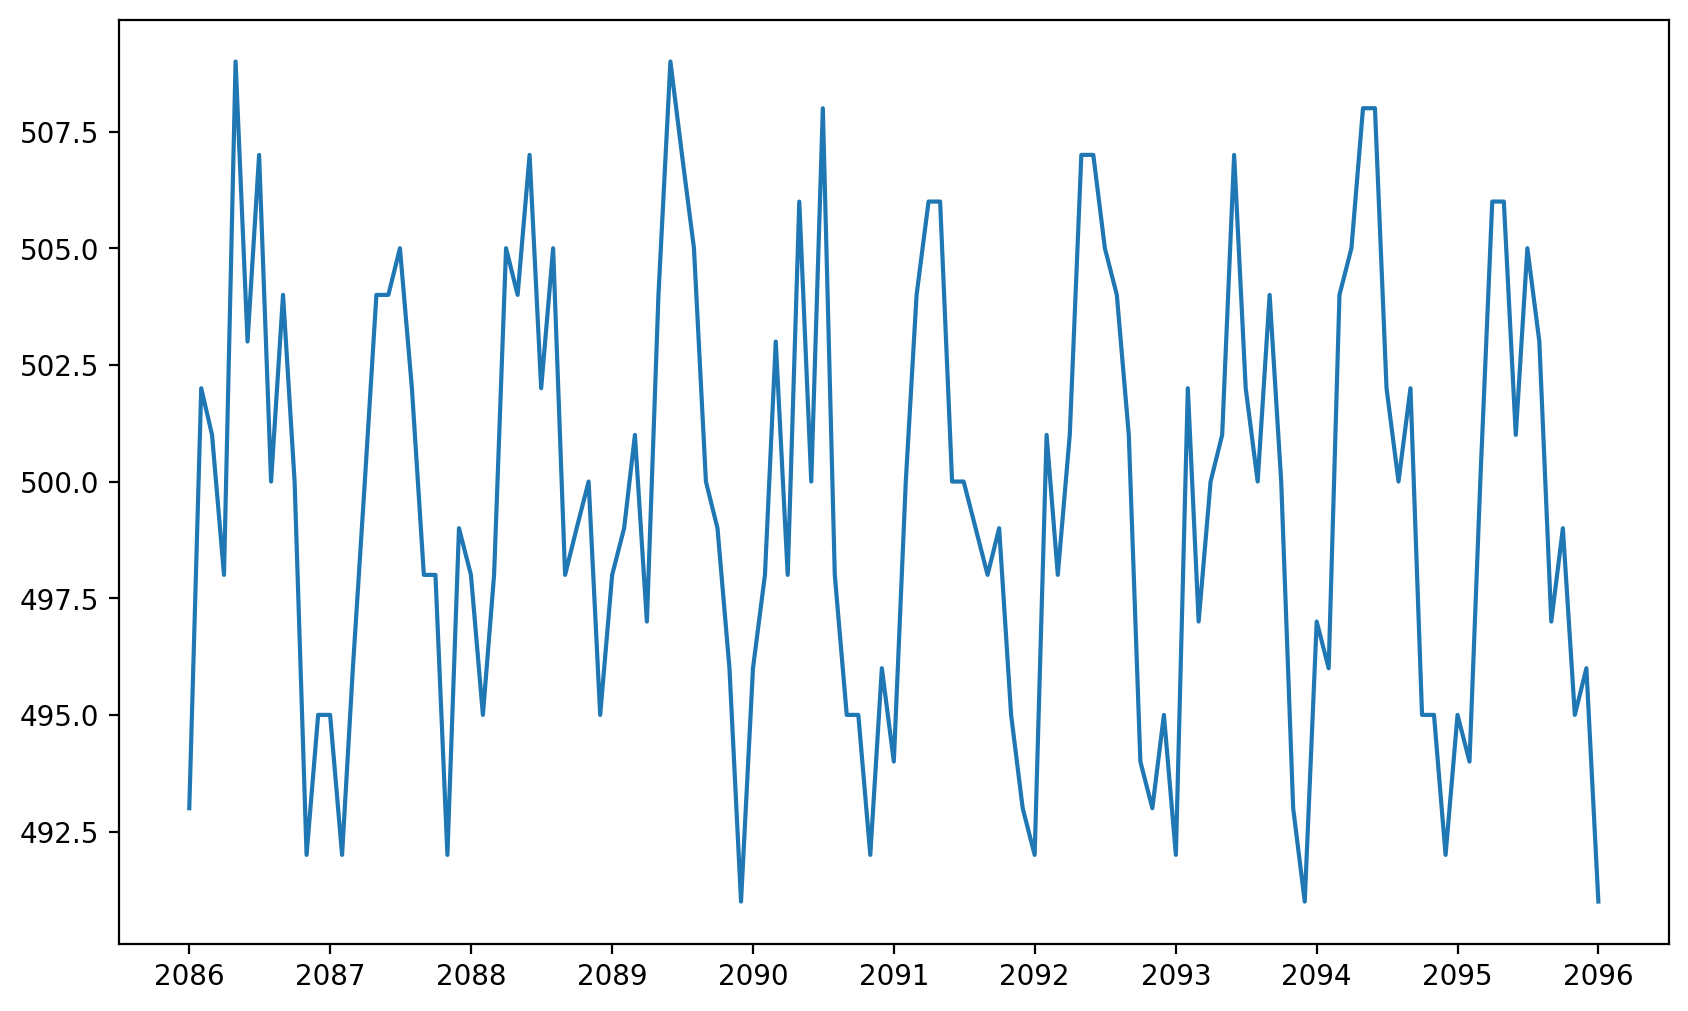

In [25]:
# создаем обучающий датафрейм
df = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})
df = df[df['ds'].dt.year > 2085]
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'])
plt.show()

22:06:32 - cmdstanpy - INFO - Chain [1] start processing
22:06:32 - cmdstanpy - INFO - Chain [1] done processing


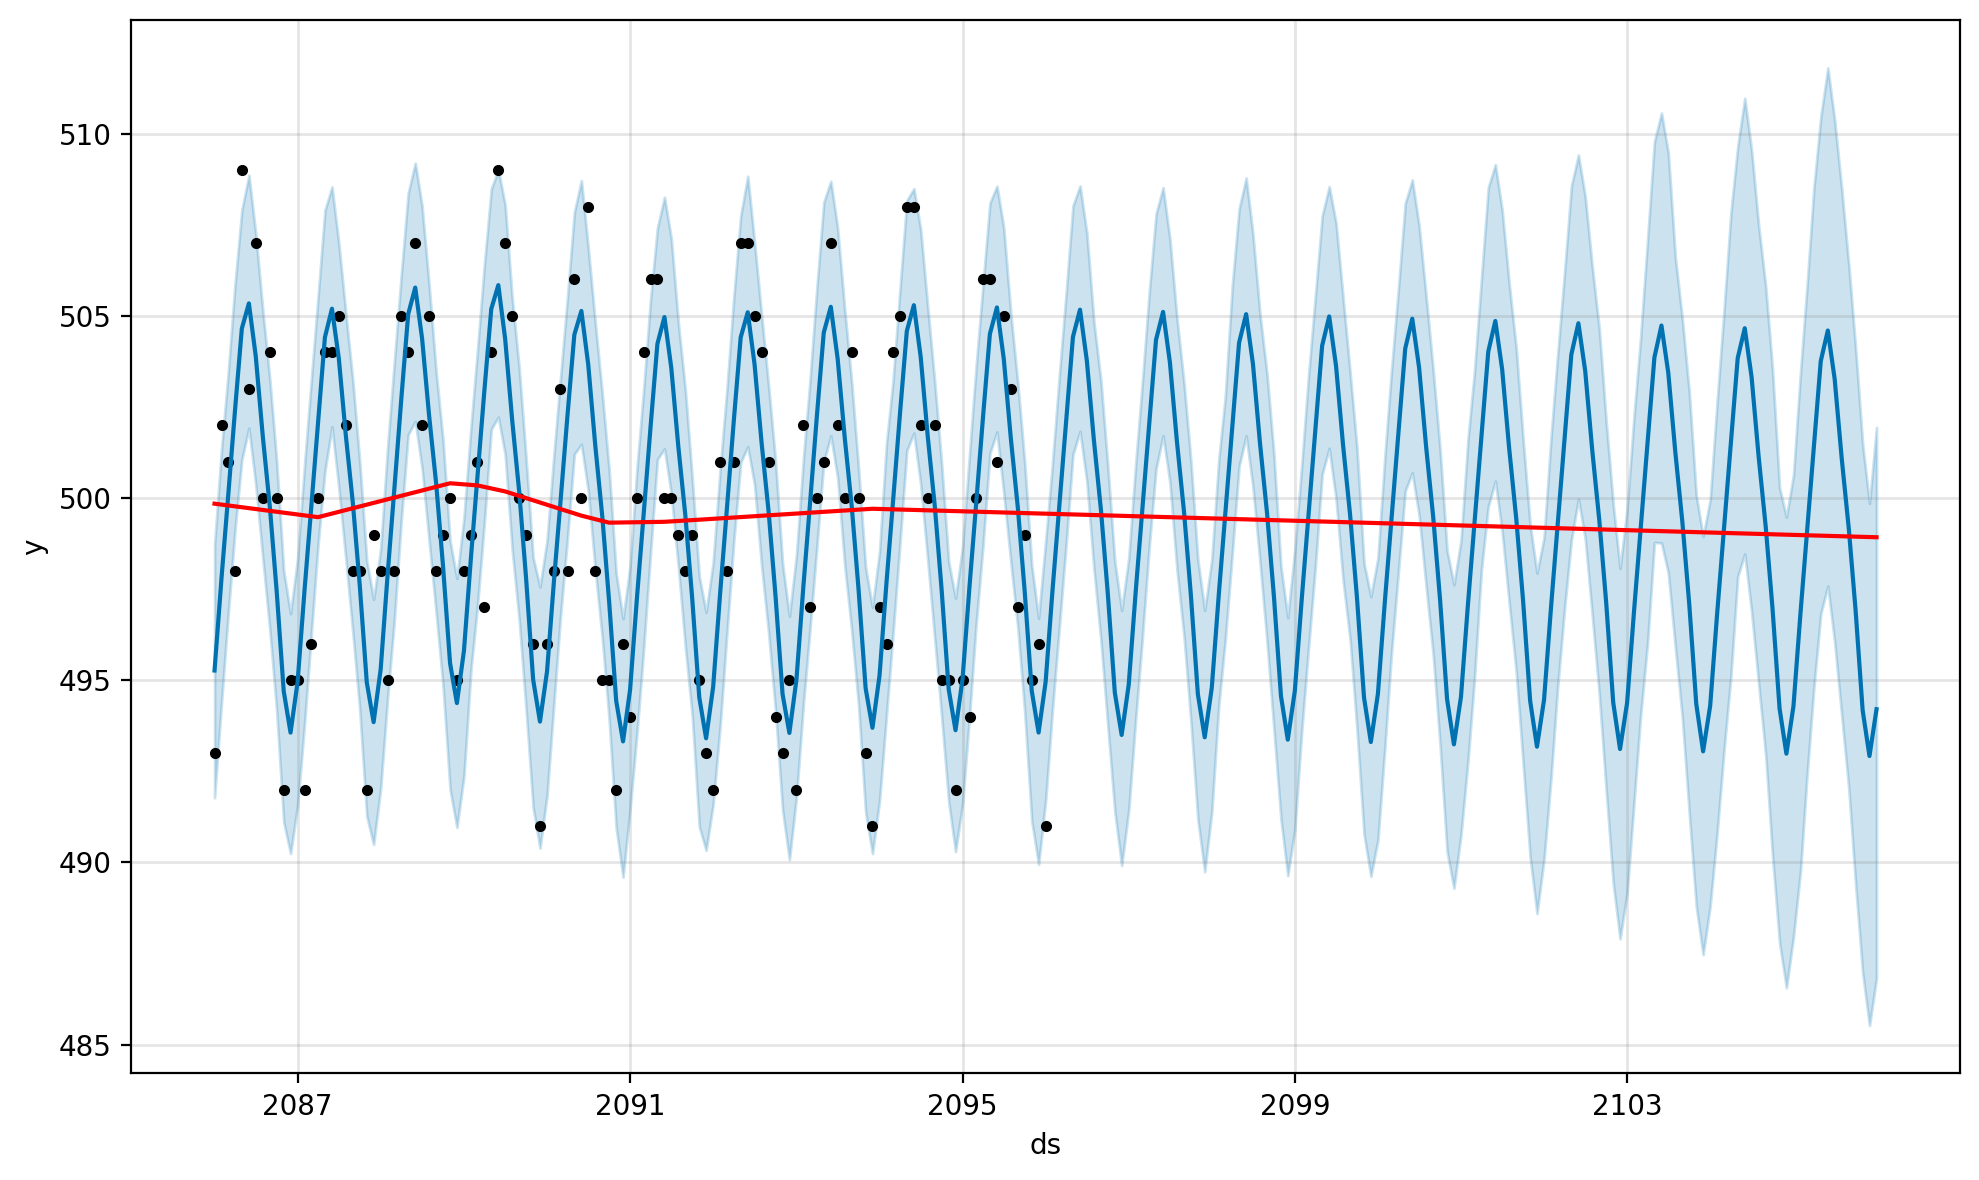

In [26]:
# создаем модель Prophet с линейным ростом 
# и мультипликативной сезонностью
model = Prophet(growth='linear',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
# обучаем модель
model.fit(df)
# создаем удлиненный датафрейм, задав ежемесячную частоту,
# поскольку мы создали ежемесячный временной ряд
future = model.make_future_dataframe(periods=12 * 10, freq='M')
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
# накладываем линию тренда на график прогнозов
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

22:06:33 - cmdstanpy - INFO - Chain [1] start processing
22:06:33 - cmdstanpy - INFO - Chain [1] done processing


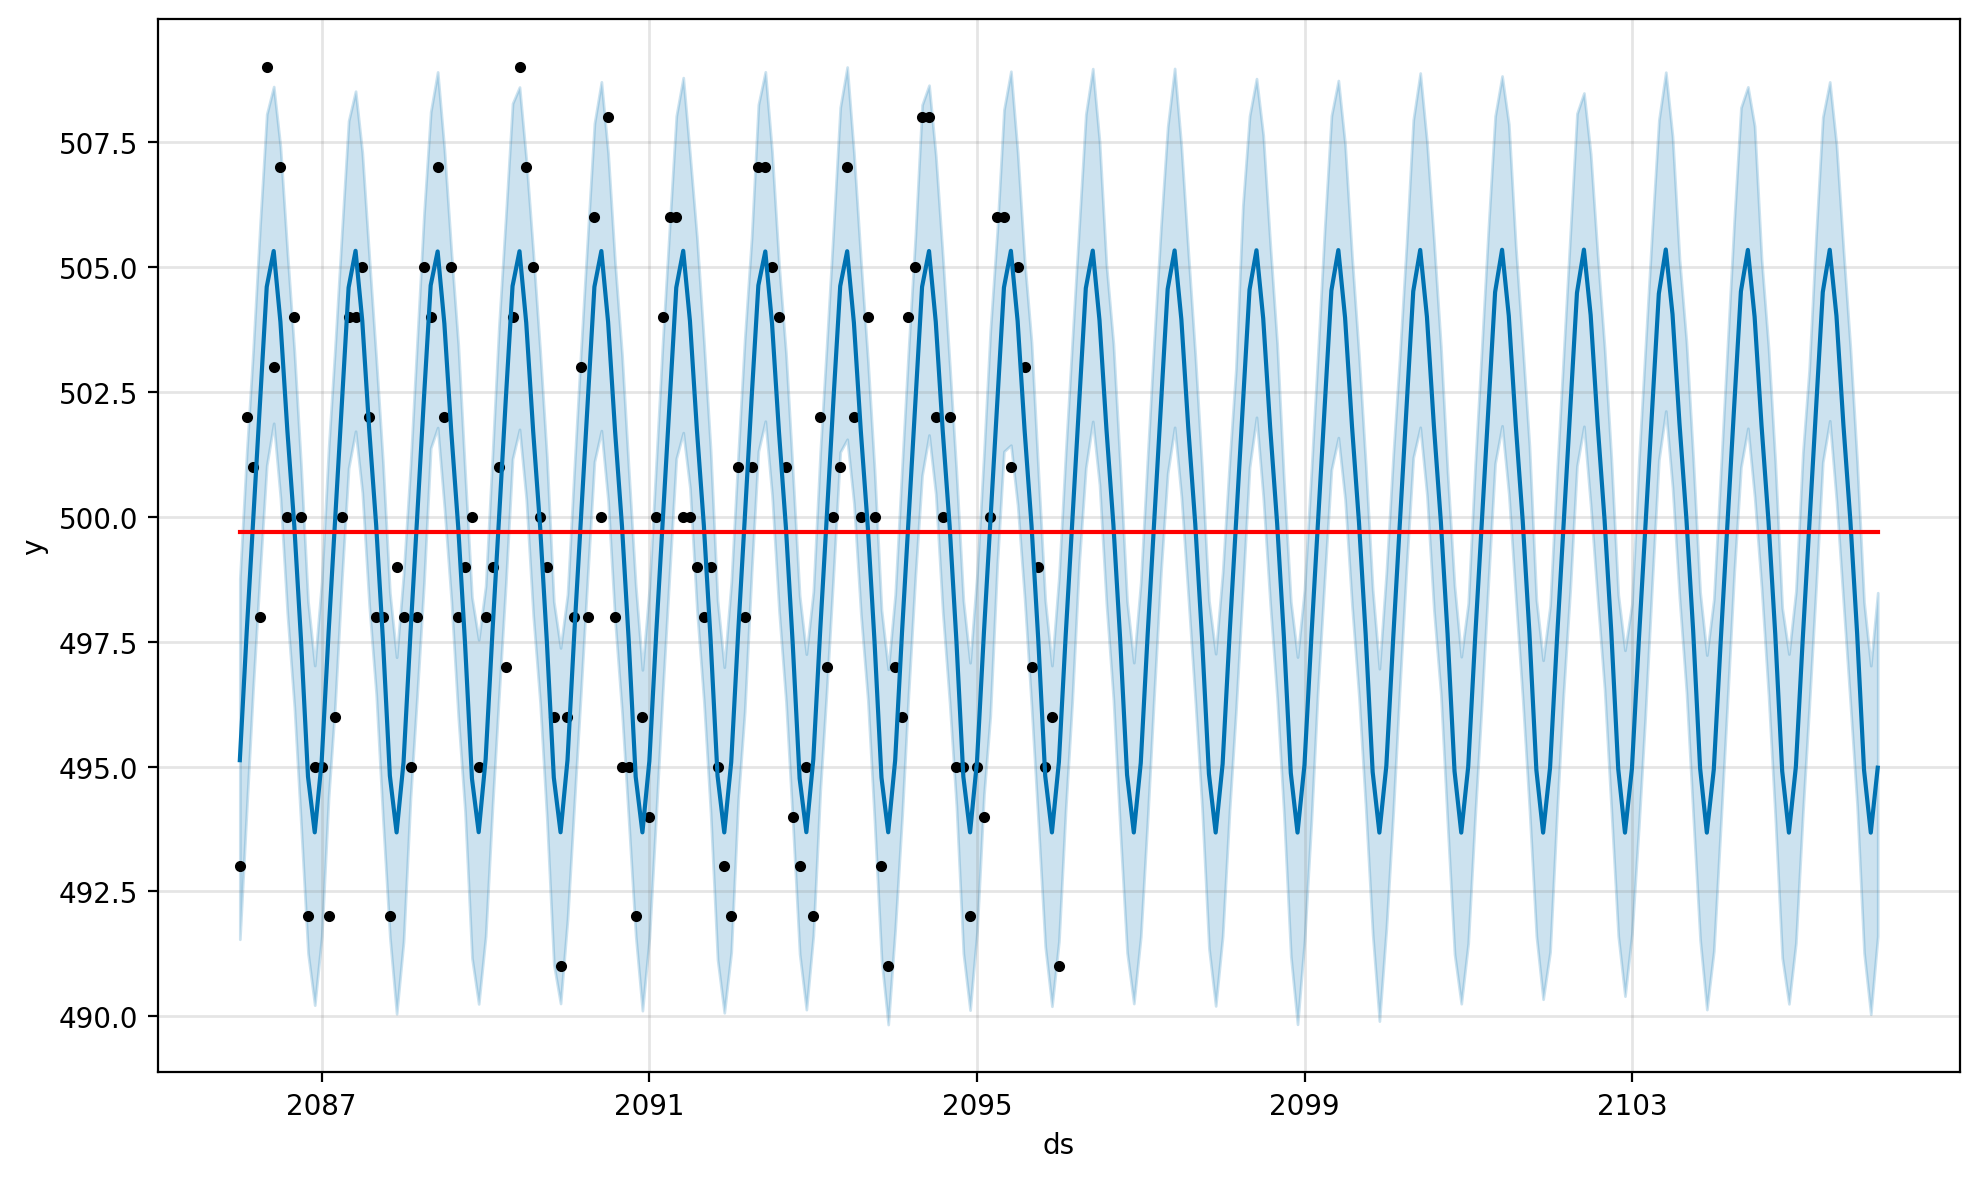

In [27]:
# создаем модель Prophet с плоским ростом 
# и мультипликативной сезонностью
model = Prophet(growth='flat',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
# обучаем модель
model.fit(df)
# создаем удлиненный датафрейм, задав ежемесячную частоту,
# поскольку мы создали ежемесячный временной ряд
future = model.make_future_dataframe(periods=12 * 10, freq='M')
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
# накладываем линию тренда на график прогнозов
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()